# Pymaceuticals Inc.
---

### Analysis
Comparison Between Regimens: After running a statistical summary 

Capomulin and Ramicane: These two regimens have lower mean, median, variance, and standard deviation than others, suggesting they may be more effective in reducing tumor volume. Moreover, Ketapril, Naftisol, and Placebo regimens have higher mean, median, variance, and standard deviation, indicating a more extensive spread of tumor volume data and potentially less effectiveness in reducing tumor size. Lastly, Ceftamin, Infubinol, Propriva, Stelasyn, and Zoniferol: These regimens fall between the more practical (Capomulin, Ramicane) and less effective (Ketapril, Naftisol, Placebo) groups in terms of tumor volume reduction.

An Observation of the visual display indicates that 
 
Both Capomulin and Ramicane treatments have potential outliers, with Capomulin having two potential outliers and Ramicane having one. However, Infubinol and Ceftamin treatments do not have any potential outliers within the IQR range. Meanwhile, the interquartile range (IQR) represents the middle 50% of the data, indicating the spread of values where most data points lie. Lower IQR values suggest a tighter cluster of data points around the median
 .
 Correlation can be interpreted in three pairs: positive, strong, releva
nce
The positive correlation coefficient of 0.84 suggests that the average tumor volume increases as mouse weight increases. In other words, heavier mice tend to have larger average tumor volumes, and lighter mice tend to have smaller average tumor volumes. Additionally, the Strength of the Correlation: The correlation coefficient of 0.84 indicates a strong positive relationship between mouse weight and average tumor volume. This means that changes in mouse weight are closely associated with corresponding changes in average tumor volume. Due to the strength of the correlation, researchers can have higher confidence in the relationship between these variables. Therefore, Relevance to the Study: In the context of the study, the strong positive correlation between mouse weight and average tumor volume can have several implications:



- 
 

In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [85]:
 print(mouse_metadata.shape)
mouse_metadata.head()

(249, 5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [86]:
print(study_results.shape)
study_results.head()

(1893, 4)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [87]:
print(df.shape)
df.info()

(1893, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [88]:
 # Checking the number of mice.
df["Mouse ID"].nunique()

249

In [89]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False).head(10)

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
a203      0            1
q633      0            1
q610      20           1
          25           1
          30           1
dtype: int64

In [90]:
# Optional: Get all the data for the duplicate mouse ID. 
mask = df["Mouse ID"] == "g989"
df.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [91]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Dropping the duplicate mouse by its ID
mask = df["Mouse ID"] != "g989"
df2 = df.loc[mask].reset_index(drop=True)


# Display the cleaned DataFrame
print("Cleaned DataFrame:")
print(df2)

# Display the shape of the cleaned DataFrame
print("\nShape of the cleaned DataFrame:", df2.shape)


Cleaned DataFrame:
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1875     r944         45           41.581521                 2    Capomulin   
1876     u364         45           31.023923                 3    Capomulin   
1877     p438         45           61.433892                 1     Ceftamin   
1878     x773         45           58.634971                 4      Placebo   
1879     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_months  Weight

In [92]:
# Checking the number of mice in the clean DataFrame.
df2["Mouse ID"].nunique()

248

## Summary Statistics

In [93]:
# Group by 'Drug Regimen' and calculate summary statistics
summary_stats = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Std Deviation', 'SEM']

# Display the summary statistics table
print(summary_stats)

                   Mean     Median   Variance  Std Deviation       SEM
Drug Regimen                                                          
Capomulin     40.675741  41.557809  24.947764       4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177       6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684       6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577       8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479       8.134708  0.596466
Placebo       54.033581  52.288934  61.168083       7.821003  0.581331
Propriva      52.322552  50.854632  42.351070       6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704       4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562       7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355       6.966589  0.516398


In [95]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
cols_agg = {
    "Tumor Volume (mm3)": ["mean", "median",]
}
leaderboard2 = df2.groupby(["Drug Regimen"]).agg(cols_agg).reset_index()
leaderboard2


Drug Regimen Tumor Volume (mm3)           
                             mean     median
0    Capomulin          40.675741  41.557809
1     Ceftamin          52.591172  51.776157
2    Infubinol          52.884795  51.820584
3     Ketapril          55.235638  53.698743
4     Naftisol          54.331565  52.509285
5      Placebo          54.033581  52.288934
6     Propriva          52.320930  50.446266
7     Ramicane          40.216745  40.673236
8     Stelasyn          54.233149  52.431737
9    Zoniferol          53.236507  51.818479

## Bar and Pie Charts

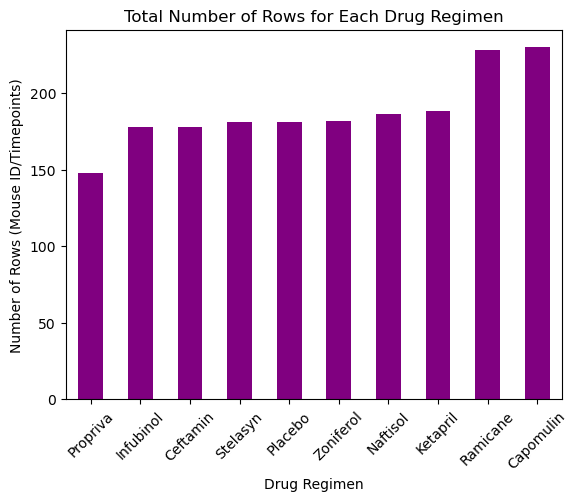

In [44]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
df2["Drug Regimen"].value_counts().sort_values().plot(kind='bar', color='purple')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xticks(rotation=45)
plt.show()

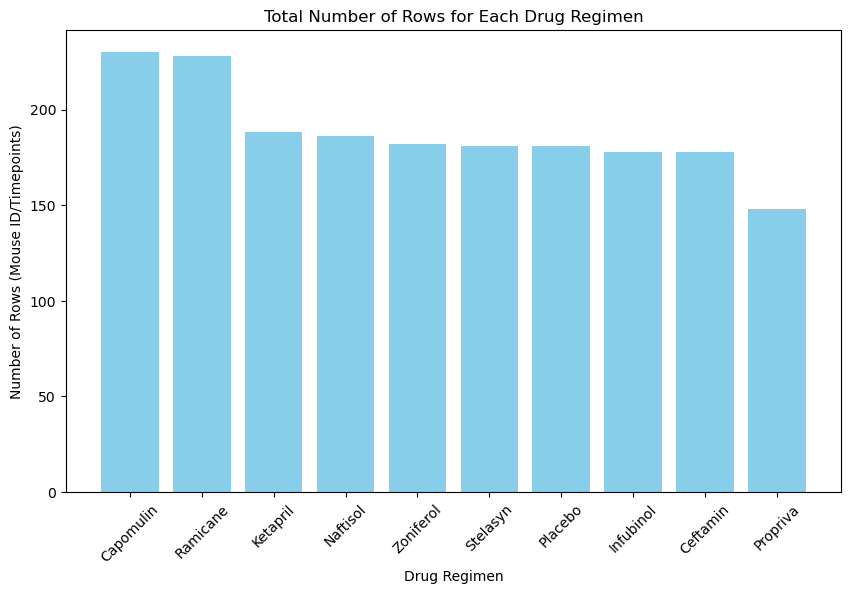

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
data = df2["Drug Regimen"].value_counts()
x = list(data.index)
y = list(data.values)

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xticks(rotation=45)
plt.show()

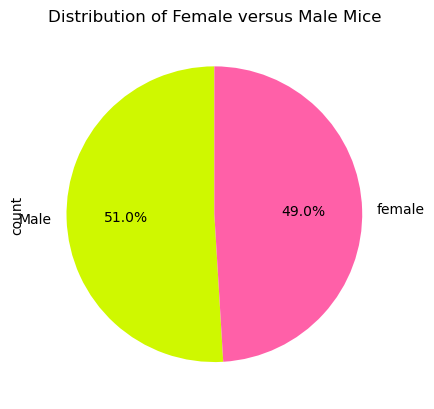

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df2["Sex"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#cff800','#ff60a8'], labels=['Male', 'female'])
plt.title('Distribution of Female versus Male Mice')
plt.show()

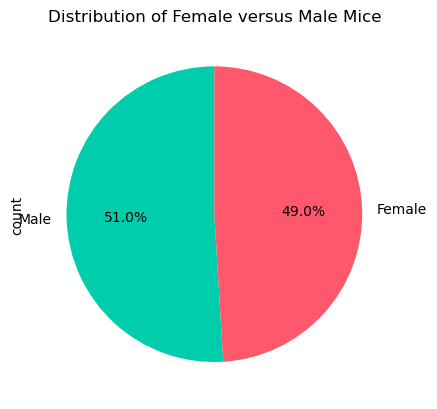

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Calculate the distribution of female versus male mice
sex_counts = df2["Sex"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#00cdac', '#ff576b'], labels=sex_counts.index)
plt.title('Distribution of Female versus Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = df[df['Drug Regimen'].isin(drug_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoints, df, on=['Mouse ID', 'Timepoint'], how='left')


# Display the resulting DataFrame
print("Final Tumor Volume for Each Mouse Across Selected Regimens:")
print(merged_df)

Final Tumor Volume for Each Mouse Across Selected Regimens:
   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0      a203         45           67.973419                 2    Infubinol   
1      a251         45           65.525743                 1    Infubinol   
2      a275         45           62.999356                 3     Ceftamin   
3      a411         45           38.407618                 1     Ramicane   
4      a444         45           43.047543                 0     Ramicane   
..      ...        ...                 ...               ...          ...   
95     y769         45           68.594745                 4     Ceftamin   
96     y793         45           31.896238                 2    Capomulin   
97     y865         45           64.729837                 3     Ceftamin   
98     z578         45           30.638696                 0     Ramicane   
99     z581         45           62.754451                 3    Infubinol   

       Sex  Age

In [52]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = df.loc[df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset
    tumor_vol_data.append(treatment_data)
    
    # Calculate the IQR
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    print(f"{treatment} treatment:")
    print(f"   Lower quartile: {lowerq}")
    print(f"   Upper quartile: {upperq}")
    print(f"   IQR: {iqr}")
    print(f"   Potential outliers: {treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]}")


Capomulin treatment:
   Lower quartile: 37.685932865
   Upper quartile: 45.0
   IQR: 7.314067135000002
   Potential outliers: 1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane treatment:
   Lower quartile: 36.674634585
   Upper quartile: 45.0
   IQR: 8.325365415
   Potential outliers: 1814    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol treatment:
   Lower quartile: 47.3123533
   Upper quartile: 57.314443967500004
   IQR: 10.002090667500006
   Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin treatment:
   Lower quartile: 47.2084271125
   Upper quartile: 56.801437570000004
   IQR: 9.593010457500007
   Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


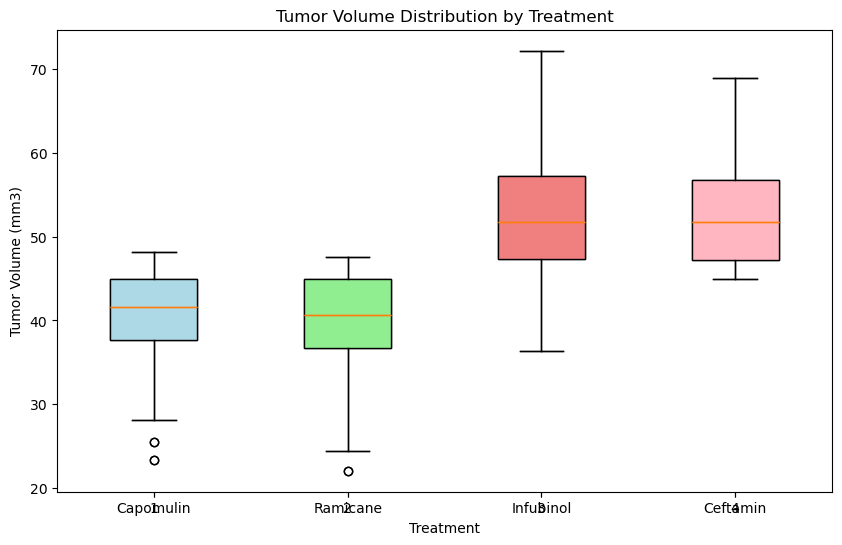

In [53]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments, patch_artist=True)

# Customizing the plot
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink']
for patch, color in zip(plt.boxplot(tumor_vol_data, patch_artist=True)['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Tumor Volume Distribution by Treatment')
plt.xlabel('Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

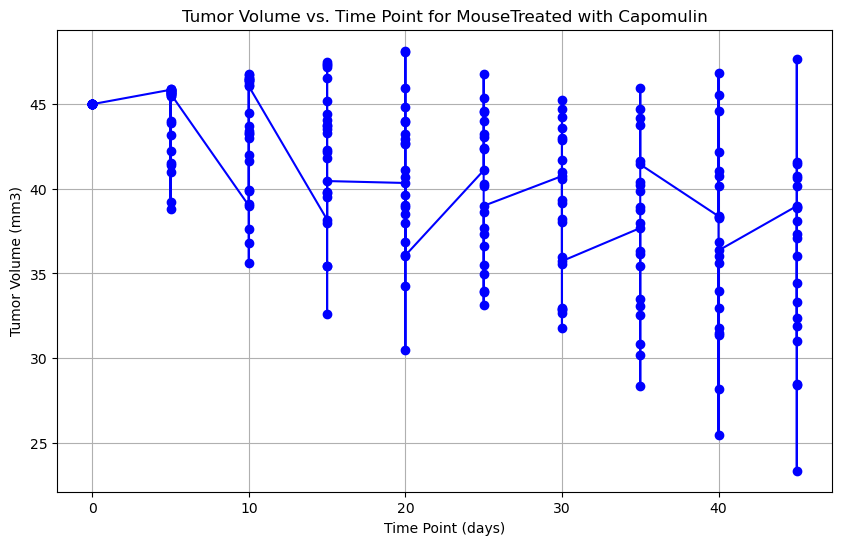

In [61]:
capomulin_data = df[(df['Drug Regimen'] == 'Capomulin') & (df['Mouse ID'])]

# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.figure(figsize=(10, 6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')

# Customizing the plot
plt.title(f'Tumor Volume vs. Time Point for MouseTreated with Capomulin')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

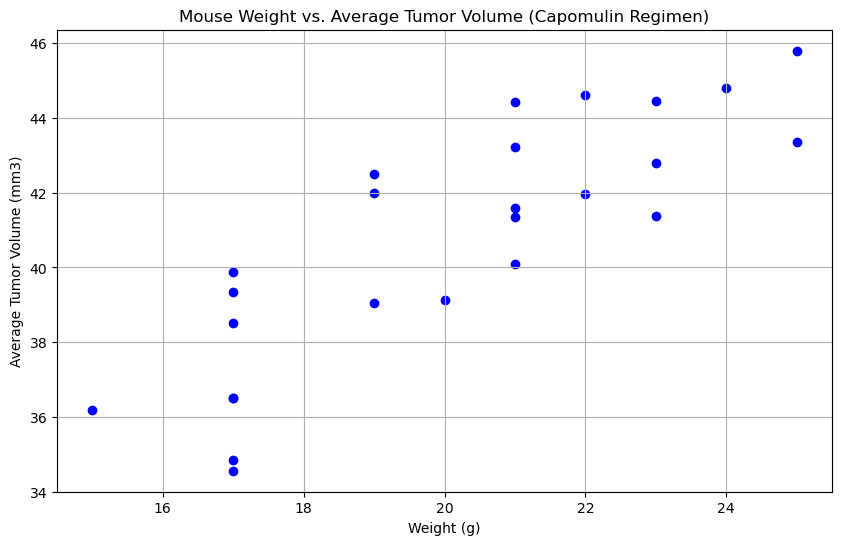

In [62]:
# Filter the DataFrame to include only the Capomulin regimen
capomulin_data = df[df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding mouse weights
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, avg_tumor_volume, marker='o', color='b')

# Customizing the plot
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


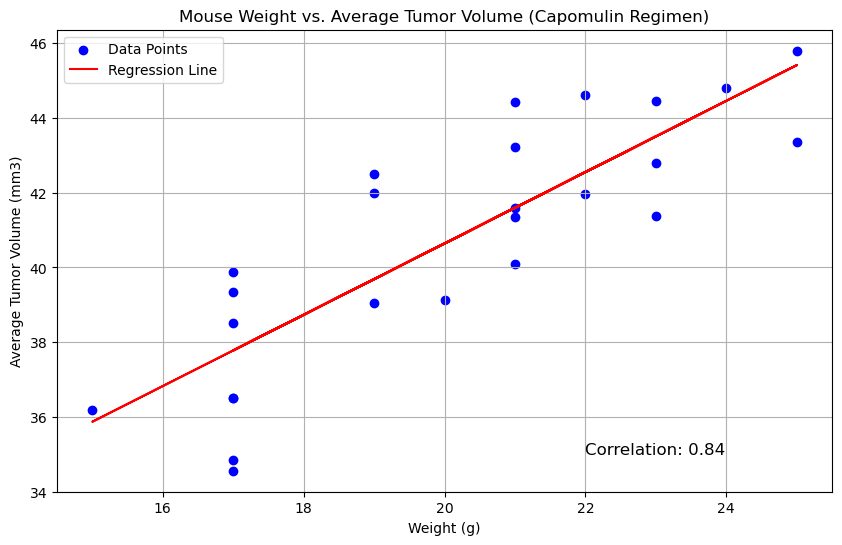

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress  # Import linregress from scipy.stats



# Filter the DataFrame to include only the Capomulin regimen
capomulin_data = df[df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding mouse weights
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(mouse_weights, avg_tumor_volume)
regress_values = mouse_weights * slope + intercept  # Define regress_values here

# Calculate the correlation coefficient
correlation_coefficient = avg_tumor_volume.corr(mouse_weights)

# Generate the scatter plot with a solid line for regression
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, avg_tumor_volume, marker='o', color='b', label='Data Points')
plt.plot(mouse_weights, regress_values, color='r', linestyle='-', label='Regression Line')

# Customizing the plot
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.legend()

# Display the correlation coefficient on the plot
plt.text(22, 35, f"Correlation: {correlation_coefficient:.2f}", fontsize=12, color='black')

# Show the plot
plt.show()
